In [24]:
!pwd
%cd /Users/henrycousins/gits/nxviz
!ls



/Users/henrycousins/gits/nxviz
/Users/henrycousins/gits/nxviz
LICENSE           __pycache__       test_jiggle.ipynb
README.md         nxjiggle.py


In [25]:
from nxjiggle import main_jiggle

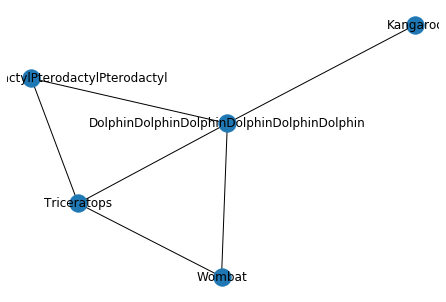

In [26]:
import networkx as nx

G = nx.Graph()


G.add_edge('DolphinDolphinDolphinDolphinDolphinDolphin', 'Triceratops')
G.add_edge('Triceratops', 'PterodactylPterodactylPterodactylPterodactyl')
G.add_edge('PterodactylPterodactylPterodactylPterodactyl', 'DolphinDolphinDolphinDolphinDolphinDolphin')
G.add_edge('Wombat', 'DolphinDolphinDolphinDolphinDolphinDolphin')
G.add_edge('Triceratops', 'Wombat')
G.add_edge('DolphinDolphinDolphinDolphinDolphinDolphin', 'Kangaroo')

pos = nx.spring_layout(G)

nx.draw(G, with_labels=True, pos=pos)

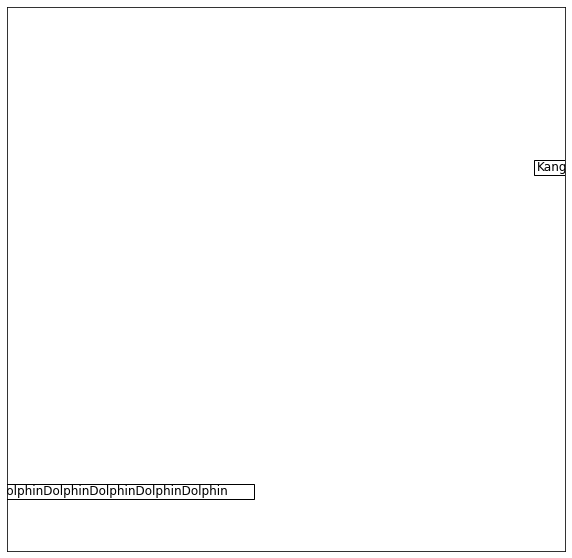

TypeError: calculate_overlap() missing 1 required positional argument: 'node_bboxes'

In [27]:
main_jiggle(G, pos)
